# Example 6: Rocking curves

With `m2SANS` you can simulate scattering patterns for rocking curves, where either the sample or the sample environment is rotated or tilted in the neutron beam via the keywords `roll`, `pitch` or `yaw` (see figure below). This will affect the magnetic scattering in a variety of ways:

- First, the spatial arrangement (repectively projection) of scatterers is modified.
- Second, the magnetisation components $\vec{M}_{\perp}(\vec{Q})$ perpendicular to the scattering vector $\vec{Q}$ change, which affects the magnetic scattering lengths $\vec{b}_{\vec{M}_{\perp}}$
- Third, the neutron polarisation $\vec{P}$ is modified if the sample environment is rotated. This will affect the projections of the magnetic scattering lenght, and ultimatively the distribution of the scattering cross sections.

![Rotations of sample and sample environment](rotations_overview.png "Coordinate systems for a SANS experiment")

## How to simulate a rocking curve

To simulate a rocking curve, for each rotation setting you have to initialise a new `mm2SANS.Experiment` object -- which contains the transformed coordinates $\vec{R}_i$ and moments $\vec{M}_i$ of the individual scatterers and the neutron polarisation $\vec{P}$, all defined in the beamline coordinate system ($U$, $V$, $W$) -- and then calculate the scattering patterns.

To do so, follow these steps (some may be omitted, but please carefult to not overwrite settings inadvertedly):

1. Initialise your `mm2SANS.Sample` and `mm2SANS.Probe` object. This only needs to be done in the beginning. The following steps are then for each roation angle.
2. Re-set the neutron polarisation.
3. Set sample rotations and sample environment roations.
4. Calculate the rotation matrices.
5. Initiate a new `mm2SANS.Experiment` object, which takes care of all transformations.
6. Optional: If the neutron polarisation $\vec{P}$ is _not_ set within the sample environment but within beamline coordinate system, you have to re-set the value of `mm2SANS.Experiment.Probe.Beamline.neutron_polarisation` accordingly.
7. Calculate the scattering patterns.
8. Visualise.

### Initialise Sample and Probe object

In the follwing, we consider a uniformly magnetised sphere along (0, 1, 0), i.e. parallel to the horizontal detector plane, and a longitudinal neutron polarisation (1, 0, 0), i.e. parallel to the beam. The sample is subjected to “yaw” rotations, which correspond to rotations around the vertical detector axis. 

In [1]:
import mm2SANS

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# general settings
moment_direction = [0, 1, 0]
neutron_polarisation = [1, 0, 0]

# settings for rocking curve
rotation_axis, num_rotations, delta_phi, plot_property = 'yaw', 4, 2.5, 'I_dif'

# get list of rotation angles
rotation_list = np.arange(0, (num_rotations+1) * delta_phi, delta_phi) - num_rotations / 2 * delta_phi

In [3]:
""" create the Sample object (using settings from Example 1)"""
sample = mm2SANS.Sample(
    positions=[[0, 0, 0]],
    moments=[moment_direction],
    scattering_length_density=(8.024-0.001j),
    saturation_magnetisation=800e3,
    voxel_volumes= 4/3 * np.pi * 10e-9**3 ,
    periodicity=(50e-9, 50e-9, 50e-9),
    print_diagnostics=False,
    )

""" create a Detector object (using Settings from Example 2) """
probe = mm2SANS.Probe(
      sans_instrument='test'
    , neutron_wavelength=6e-10 # in m
    , detector_distance=15 # in m
    , qmap_disorder=0.35 # to avoid Fourier transform artefacts
    , neutron_polarisation=neutron_polarisation
   )

### Rocking curves: Plot scattering patterns

In this case, showing a reversal of the magnetic contrast...

C:\ProgramData\Anaconda3\lib\site-packages\mm2sans-0.1-py3.6.egg\mm2SANS\experiment.py:650: UserWarning: No contour levels were found within the data range.


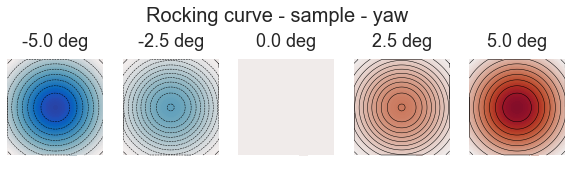

In [4]:
# initialise figure
axis_size = 2
fig = plt.figure( figsize = (axis_size * (num_rotations+1), axis_size) )
fig.suptitle(f'Rocking curve - sample - {rotation_axis}', fontsize=20, y=1.2)
gs = gridspec.GridSpec(1, (num_rotations+1) )

#data limit, so that all curves are scaled the same
col_limit = 1.5

# iterate over rotation angles
for i, phi in enumerate(rotation_list):

    # re-set neutron polarisation (not really neccessary here)
    probe.Beamline.neutron_polarisation = neutron_polarisation
    # set rotations (setting the environment rotations is not really neccessary here)
    probe.Beamline.sample_rotations = [[rotation_axis, phi]]
    probe.Beamline.sample_environment_rotations = []
    # re-calculate rotation matices
    probe.Beamline.calc_rotation_matrices()

    # create experiment and calculate scattering patterns
    experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
    experiment.calc_scattering_pattern(uc_repetitions=(1,1,1))

    # plot up the chosen data column
    ax = plt.subplot(gs[0, i])
    experiment.plot_property( plot_property, ax=ax
                             , title=f'{phi} deg'
                             , limit=col_limit )
    ax.axis('off')

C:\ProgramData\Anaconda3\lib\site-packages\mm2sans-0.1-py3.6.egg\mm2SANS\experiment.py:650: UserWarning: No contour levels were found within the data range.


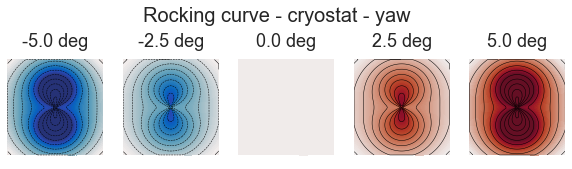

In [5]:
# initialise figure
axis_size = 2
fig = plt.figure( figsize = (axis_size * (num_rotations+1), axis_size) )
fig.suptitle(f'Rocking curve - cryostat - {rotation_axis}', fontsize=20, y=1.2)
gs = gridspec.GridSpec(1, (num_rotations+1) )

#data limit, so that all curves are scaled the same
col_limit = 1.5

# iterate over rotation angles
for i, phi in enumerate(rotation_list):

    # re-set neutron polarisation (not really neccessary here)
    probe.Beamline.neutron_polarisation = neutron_polarisation
    # set rotations (setting the environment rotations is not really neccessary here)
    probe.Beamline.sample_environment_rotations = [[rotation_axis, phi]]
    probe.Beamline.sample_rotations = []
    # re-calculate rotation matices
    probe.Beamline.calc_rotation_matrices()

    # create experiment and calculate scattering patterns
    experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
    experiment.calc_scattering_pattern(uc_repetitions=(1,1,1))

    # plot up the chosen data column
    ax = plt.subplot(gs[0, i])
    experiment.plot_property( plot_property, ax=ax
                             , title=f'{phi} deg'
                             , limit=col_limit )
    ax.axis('off')

### ... one more example...

Here, a single sphere uniformly magnetised along (0, 0, 1), i.e. the vertical detector direction and a transverse neutron polarisation along (0, 1, 0), i.e. horizontal detector direction. The difference scattering patterns are obtained for “pitch” rotations which tilt the sample towards the detector.

In [6]:
# general settings
moment_direction = [0, 0, 1]
neutron_polarisation = [0, 1, 0]

# settings for rocking curve, and get list of rotation angles
rotation_axis, num_rotations, delta_phi, plot_property = 'pitch', 4, 5, 'I_dif'
rotation_list = np.arange(0, (num_rotations+1) * delta_phi, delta_phi) - num_rotations / 2 * delta_phi

In [7]:
""" create the Sample object (using settings from Example 1)"""
sample = mm2SANS.Sample(
    positions=[[0, 0, 0]],
    moments=[moment_direction],
    scattering_length_density=(8.024-0.001j),
    saturation_magnetisation=800e3,
    voxel_volumes= 4/3 * np.pi * 10e-9**3 ,
    periodicity=(50e-9, 50e-9, 50e-9),
    print_diagnostics=False,
    )

""" create a Detector object (using Settings from Example 2) """
probe = mm2SANS.Probe(
      sans_instrument='test'
    , neutron_wavelength=6e-10 # in m
    , detector_distance=15 # in m
    , qmap_disorder=0.35 # to avoid Fourier transform artefacts
    , neutron_polarisation=neutron_polarisation
   )

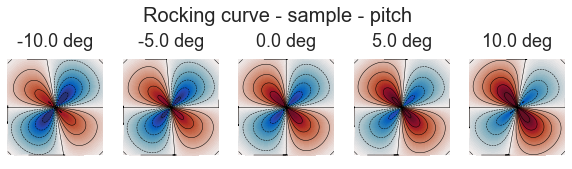

In [8]:
# initialise figure
axis_size = 2
fig = plt.figure( figsize = (axis_size * (num_rotations+1), axis_size) )
fig.suptitle(f'Rocking curve - sample - {rotation_axis}', fontsize=20, y=1.2)
gs = gridspec.GridSpec(1, (num_rotations+1) )

#data limit, so that all curves are scaled the same
col_limit = 7.5

# iterate over rotation angles
for i, phi in enumerate(rotation_list):

    # re-set neutron polarisation (not really neccessary here)
    probe.Beamline.neutron_polarisation = neutron_polarisation
    # set rotations (setting the environment rotations is not really neccessary here)
    probe.Beamline.sample_rotations = [[rotation_axis, phi]]
    probe.Beamline.sample_environment_rotations = []
    # re-calculate rotation matices
    probe.Beamline.calc_rotation_matrices()

    # create experiment and calculate scattering patterns
    experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
    experiment.calc_scattering_pattern(uc_repetitions=(1,1,1))

    # plot up the chosen data column
    ax = plt.subplot(gs[0, i])
    experiment.plot_property( plot_property, ax=ax
                             , title=f'{phi} deg'
                             , limit=col_limit )
    ax.axis('off')

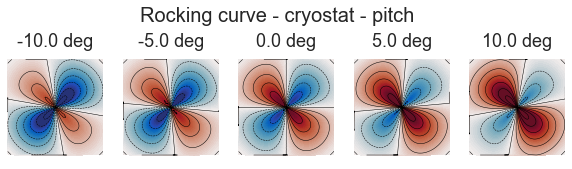

In [9]:
# initialise figure
axis_size = 2
fig = plt.figure( figsize = (axis_size * (num_rotations+1), axis_size) )
fig.suptitle(f'Rocking curve - cryostat - {rotation_axis}', fontsize=20, y=1.2)
gs = gridspec.GridSpec(1, (num_rotations+1) )

#data limit, so that all curves are scaled the same
col_limit = 7.5

# iterate over rotation angles
for i, phi in enumerate(rotation_list):

    # re-set neutron polarisation (not really neccessary here)
    probe.Beamline.neutron_polarisation = neutron_polarisation
    # set rotations (setting the environment rotations is not really neccessary here)
    probe.Beamline.sample_environment_rotations = [[rotation_axis, phi]]
    probe.Beamline.sample_rotations = []
    # re-calculate rotation matices
    probe.Beamline.calc_rotation_matrices()

    # create experiment and calculate scattering patterns
    experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
    experiment.calc_scattering_pattern(uc_repetitions=(1,1,1))

    # plot up the chosen data column
    ax = plt.subplot(gs[0, i])
    experiment.plot_property( plot_property, ax=ax
                             , title=f'{phi} deg'
                             , limit=col_limit )
    ax.axis('off')